## Author: *_Wajid Sain_*

## The Spark Foundation Internship

## Task 01 :- Predicting Using Supervised ML. Predict the percentage of an student based on the no. of study hours.

# Importing Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Preprocessing 

In [3]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
df.shape

(25, 2)

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


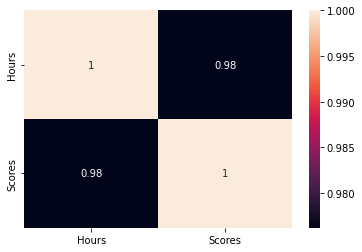

In [9]:
import seaborn as sns
corrMatrix=df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
df.nunique()

Hours     23
Scores    23
dtype: int64

# Data Visualizations

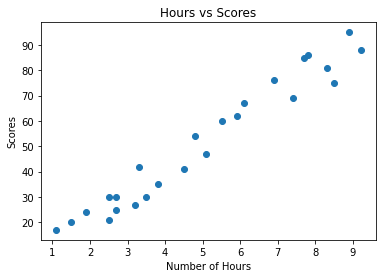

In [11]:
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

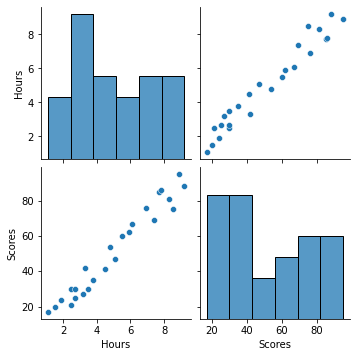

In [12]:
sns.pairplot(df)

<AxesSubplot:>

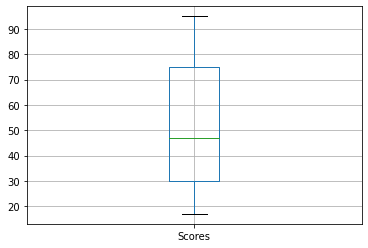

In [13]:
df.boxplot(column='Scores')

In [14]:
import statsmodels.formula.api as smf
model = smf.ols("Hours~Scores",data = df).fit()

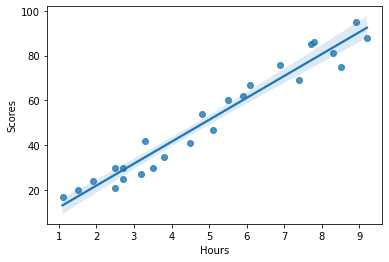

In [15]:
sns.regplot(x="Hours", y="Scores", data=df);

# Splitting Data in Train and Test

In [16]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(df['Hours'].values.reshape(-1,1),
                                                    df['Scores'], test_size = 0.3, random_state = 12)
X_train.shape, Y_train.shape, x_test.shape, y_test.shape

((17, 1), (17,), (8, 1), (8,))

# Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Predicted Line

In [18]:
coefficient = model.coef_
intercept = model.intercept_

# Since, y = m*x + c
line = (df['Hours'].values * coefficient) + intercept

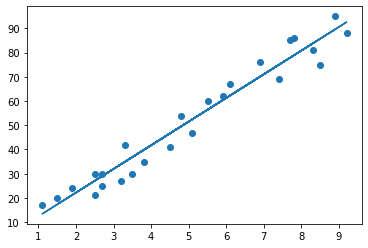

In [20]:
plt.scatter(df.Hours, df.Scores)
plt.plot(df.Hours, line)
plt.show()

In [22]:
pred = model.predict(x_test)
pred

array([74.97365707, 56.40147769, 62.26637644, 52.49154519, 89.63590396,
       83.7710052 , 36.85181518, 13.39222016])

# Actual and Predicted Values

In [23]:
pred_compare = pd.DataFrame({'Actual': y_test, 'Predicted':pred})
pred_compare

,Actual,Predicted
19,69,74.973657
7,60,56.401478
18,67,62.266376
1,47,52.491545
15,95,89.635904
8,81,83.771005
4,30,36.851815
14,17,13.392220


# Model Evaluation 

In [24]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, pred))

Mean Absolute Error:  4.79900554865473
Mean Squared Error:  24.701705618997114
Root Mean Squared Error:  4.9700810475280095
R2 Score:  0.9578604019720702


In [25]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]} will be predicted score if a student study for 9.25 hrs per day.")

93.057094895472 will be predicted score if a student study for 9.25 hrs per day.


# Prediction:-

# 93.05% will be score if a student study for 9.25 hrs per day.